NAMA : Izhar Abruzi
NIM : 06111840000101

In [233]:
!wget -content 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'

In [234]:
import os
import zipfile
local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [235]:
dir_scisors = '/content/rockpaperscissors/scissors'
dir_paper = '/content/rockpaperscissors/paper'
dir_rock= '/content/rockpaperscissors/rock'

folder_gunting = os.path.join(dir_scisors)
folder_kertas = os.path.join(dir_paper)
folder_batu = os.path.join(dir_rock)


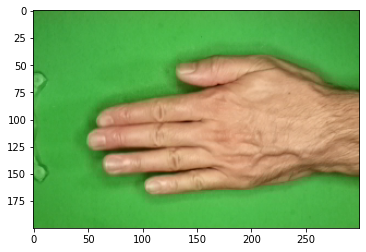

In [236]:
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

file_gunting = os.listdir(folder_gunting)
file_kertas = os.listdir(folder_kertas)
file_batu = os.listdir(folder_batu)

img = image.load_img('/content/rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png')
imgplot = plt.imshow(img)




In [237]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

datbase = os.path.join('/content/rockpaperscissors/rps-cv-images')

train_datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.4,
    horizontal_flip = True
)
val_datagen = ImageDataGenerator(
    rescale =1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.4,
    horizontal_flip = True
)


In [238]:
train_generator = train_datagen.flow_from_directory(
    datbase,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training')
validation_generator = val_datagen.flow_from_directory(
    datbase,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [239]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  
])

In [240]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [242]:
graph = model.fit(
      train_generator,
      steps_per_epoch=10, 
      epochs=10,
      validation_data=validation_generator, 
      validation_steps=10,  
      verbose=2)


Epoch 1/10
10/10 - 19s - loss: 0.3506 - accuracy: 0.8656 - val_loss: 0.2937 - val_accuracy: 0.8906
Epoch 2/10
10/10 - 17s - loss: 0.2695 - accuracy: 0.9138 - val_loss: 0.2837 - val_accuracy: 0.9094
Epoch 3/10
10/10 - 17s - loss: 0.2997 - accuracy: 0.8966 - val_loss: 0.2615 - val_accuracy: 0.9281
Epoch 4/10
10/10 - 17s - loss: 0.2971 - accuracy: 0.8931 - val_loss: 0.2342 - val_accuracy: 0.9156
Epoch 5/10
10/10 - 18s - loss: 0.2859 - accuracy: 0.8844 - val_loss: 0.2676 - val_accuracy: 0.9187
Epoch 6/10
10/10 - 18s - loss: 0.2323 - accuracy: 0.9187 - val_loss: 0.2341 - val_accuracy: 0.9250
Epoch 7/10
10/10 - 18s - loss: 0.1770 - accuracy: 0.9438 - val_loss: 0.2287 - val_accuracy: 0.9219
Epoch 8/10
10/10 - 18s - loss: 0.2377 - accuracy: 0.9031 - val_loss: 0.2878 - val_accuracy: 0.9031
Epoch 9/10
10/10 - 18s - loss: 0.2389 - accuracy: 0.9187 - val_loss: 0.2703 - val_accuracy: 0.9312
Epoch 10/10
10/10 - 18s - loss: 0.1665 - accuracy: 0.9406 - val_loss: 0.1887 - val_accuracy: 0.9375


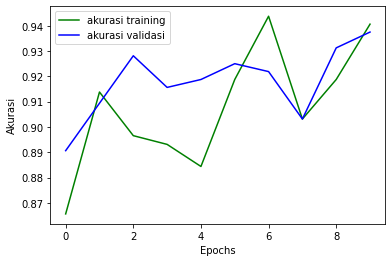

In [243]:
acc = graph.history['accuracy']
val_acc = graph.history['val_accuracy']
loss = graph.history['loss']
val_loss = graph.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs,acc,'g',label='akurasi training')
plt.plot(epochs,val_acc,'b',label='akurasi validasi')
plt.ylabel('Akurasi')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (19).png
file dengan direktori 0CSaM2vL2cWX6Cay.png
Adalah gunting


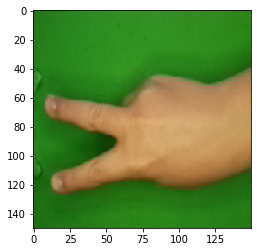

In [245]:
import numpy as np
from google.colab import files

uploaded = files.upload()

for hn in uploaded.keys():
    path = hn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=32)

    print('file dengan direktori ' + hn)
    if classes[0][0] == 1:
        print('Adalah kertas')
    elif classes[0][1] == 1:
        print('Adalah batu')
    elif classes[0][2] == 1:
        print('Adalah gunting')
    else:
      print('tidak terdeteksi')
    